In [17]:
import numpy as np
from matplotlib import pyplot as plt

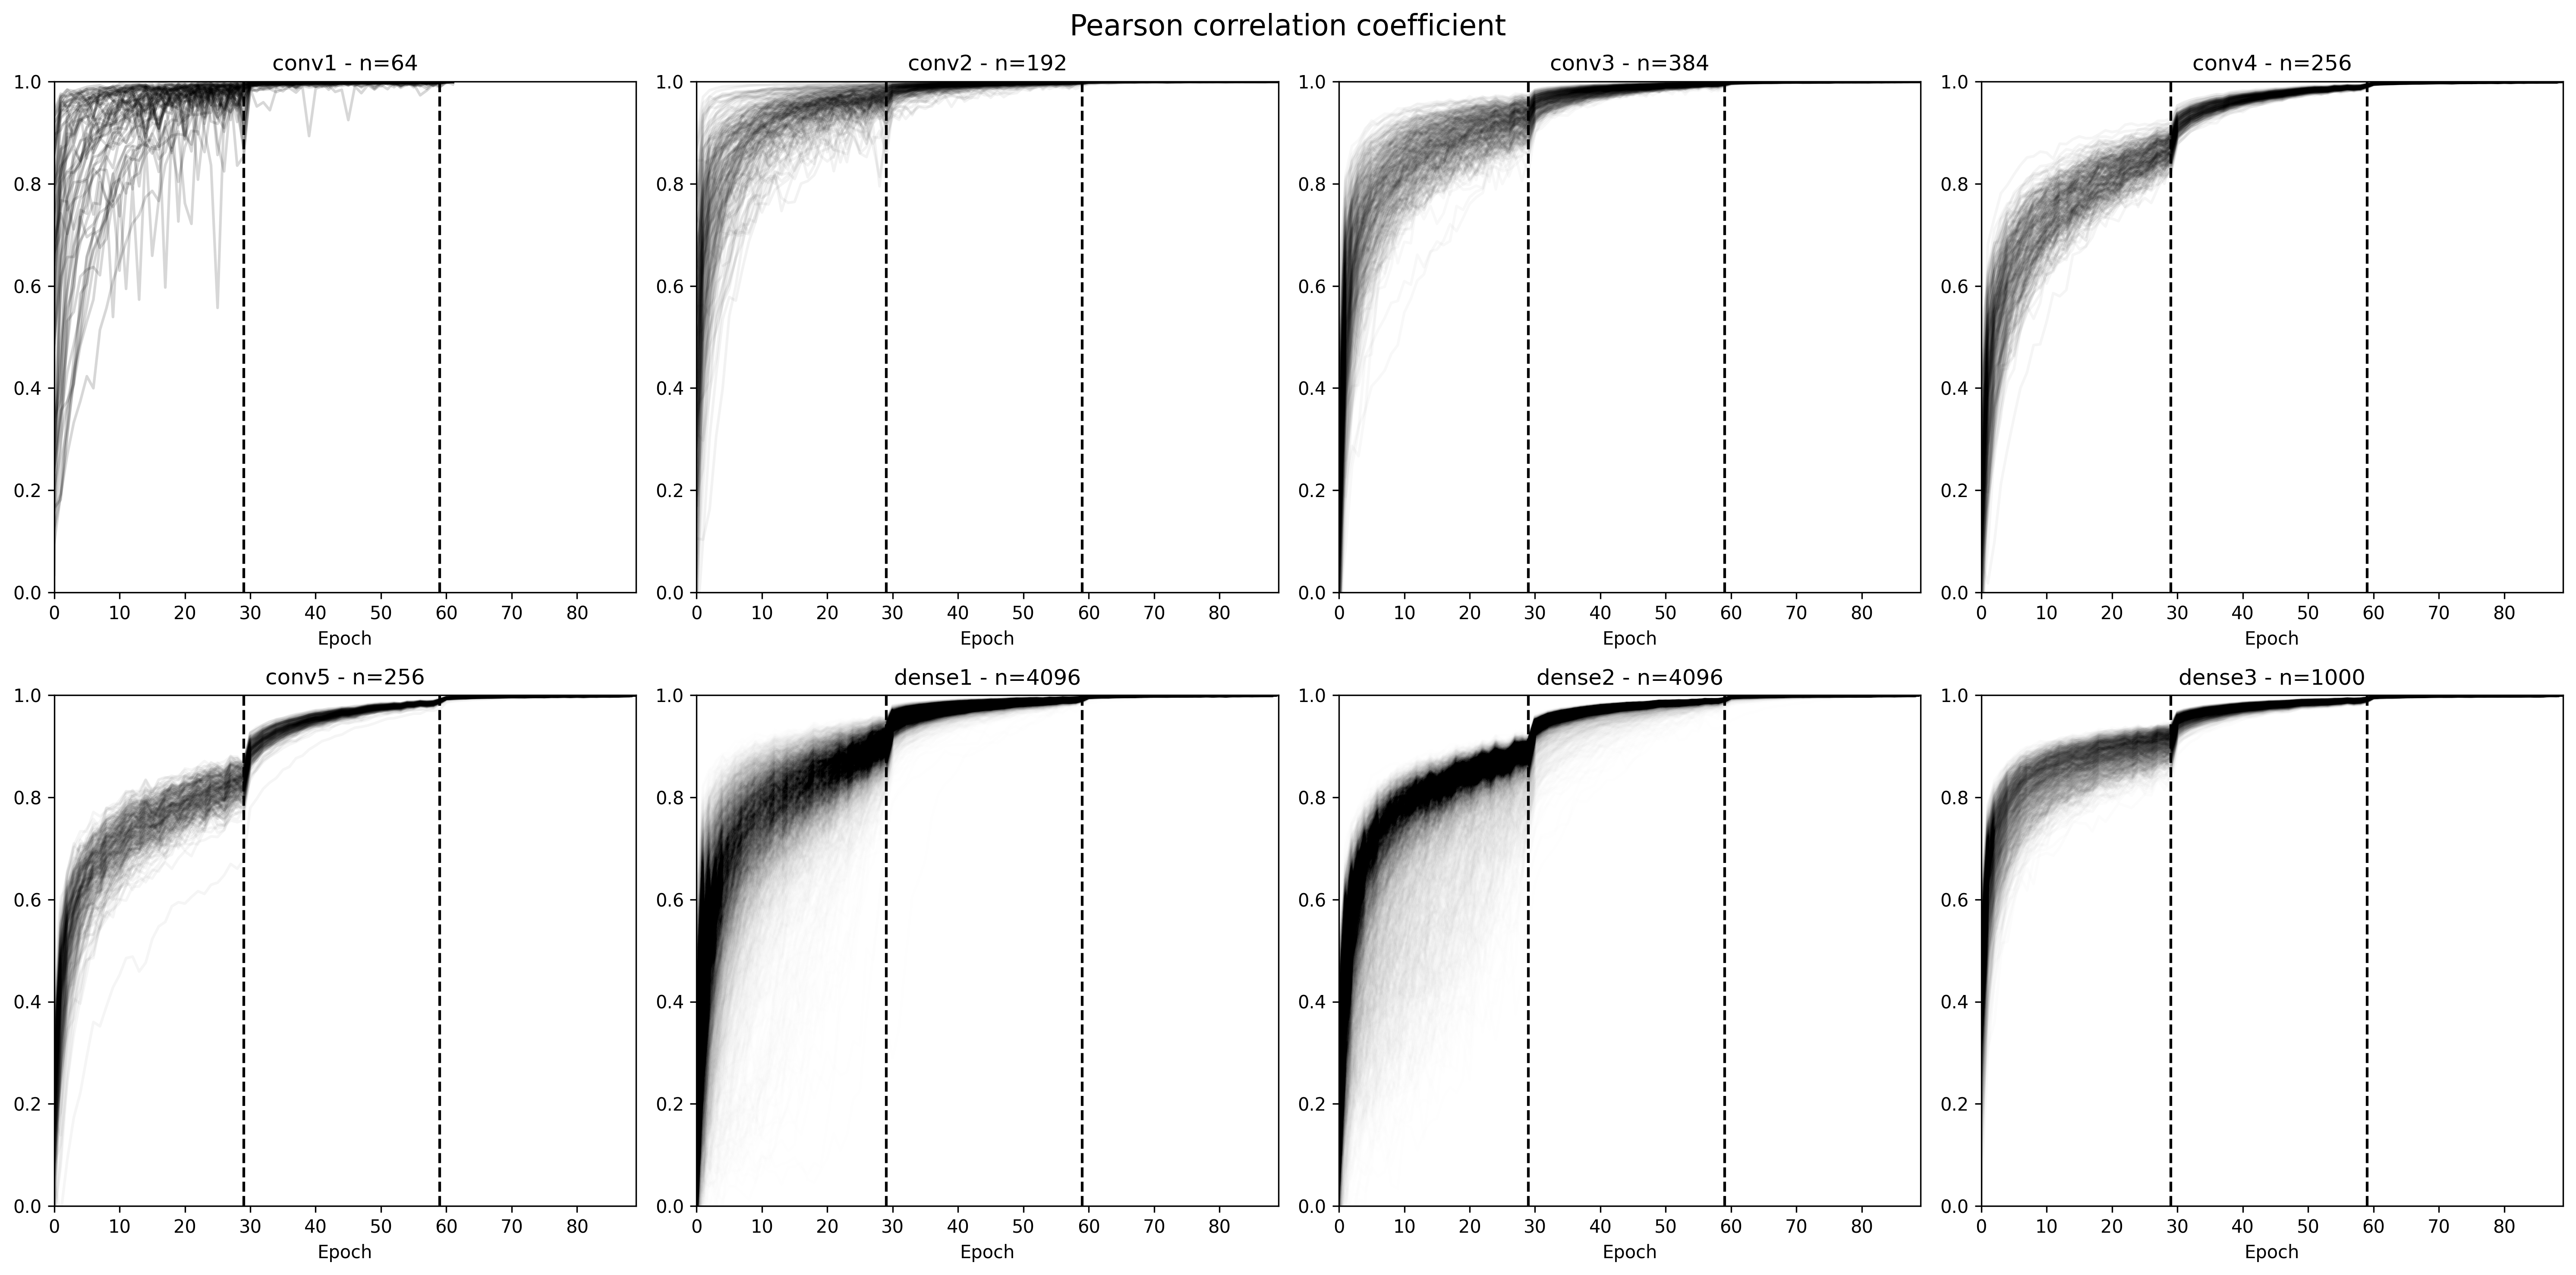

In [27]:
conv1 = np.load('conv1-pearson_scores.npy', allow_pickle=True)[()]
conv2 = np.load('conv2-pearson_scores.npy', allow_pickle=True)[()]
conv3 = np.load('conv3-pearson_scores.npy', allow_pickle=True)[()]
conv4 = np.load('conv4-pearson_scores.npy', allow_pickle=True)[()]
conv5 = np.load('conv5-pearson_scores.npy', allow_pickle=True)[()]
dense = np.load('pearson_scores_per_unit_dense.npy', allow_pickle=True)[()]

x = {**conv1, **conv2, **conv3, **conv4, **conv5, **dense}

fig, ax = plt.subplots(2, 4, figsize=(20,10), dpi=300)

num_units = [64, 192, 384, 256, 256, 4096, 4096, 1000]

ax = ax.ravel()

for i, (key, values) in enumerate(x.items()):
    arr = np.array(values)
    arr = arr.reshape(-1, num_units[i])
    
#     ax[i].plot(np.mean(arr, axis=1), 'k', alpha=1)
#     err = np.std(arr, axis=1)
#     ax[i].fill_between(np.arange(len(arr)), np.mean(arr, axis=1)-err, np.mean(arr, axis=1) + err, edgecolor='k', facecolor='lightgray', alpha=1)
    
    ax[i].set_xlim(left=0, right=89)
    ax[i].set_ylim(bottom=0, top=1)
    
#     if 'conv1' in key:
#         ax[i].plot(arr, color='k', alpha=0.2)

#     else:
#         ax[i].plot(arr, color='k', alpha=0.01)
        
    ax[i].plot(arr, color='k', alpha=0.01*1000/num_units[i])
    ax[i].axvline(29, color="k", linestyle="--")
    ax[i].axvline(59, color="k", linestyle="--")

    ax[i].set_xlabel('Epoch')
    ax[i].set_title(f"{key} - n={num_units[i]}")

fig.suptitle('Pearson correlation coefficient', fontsize=16)
plt.tight_layout()

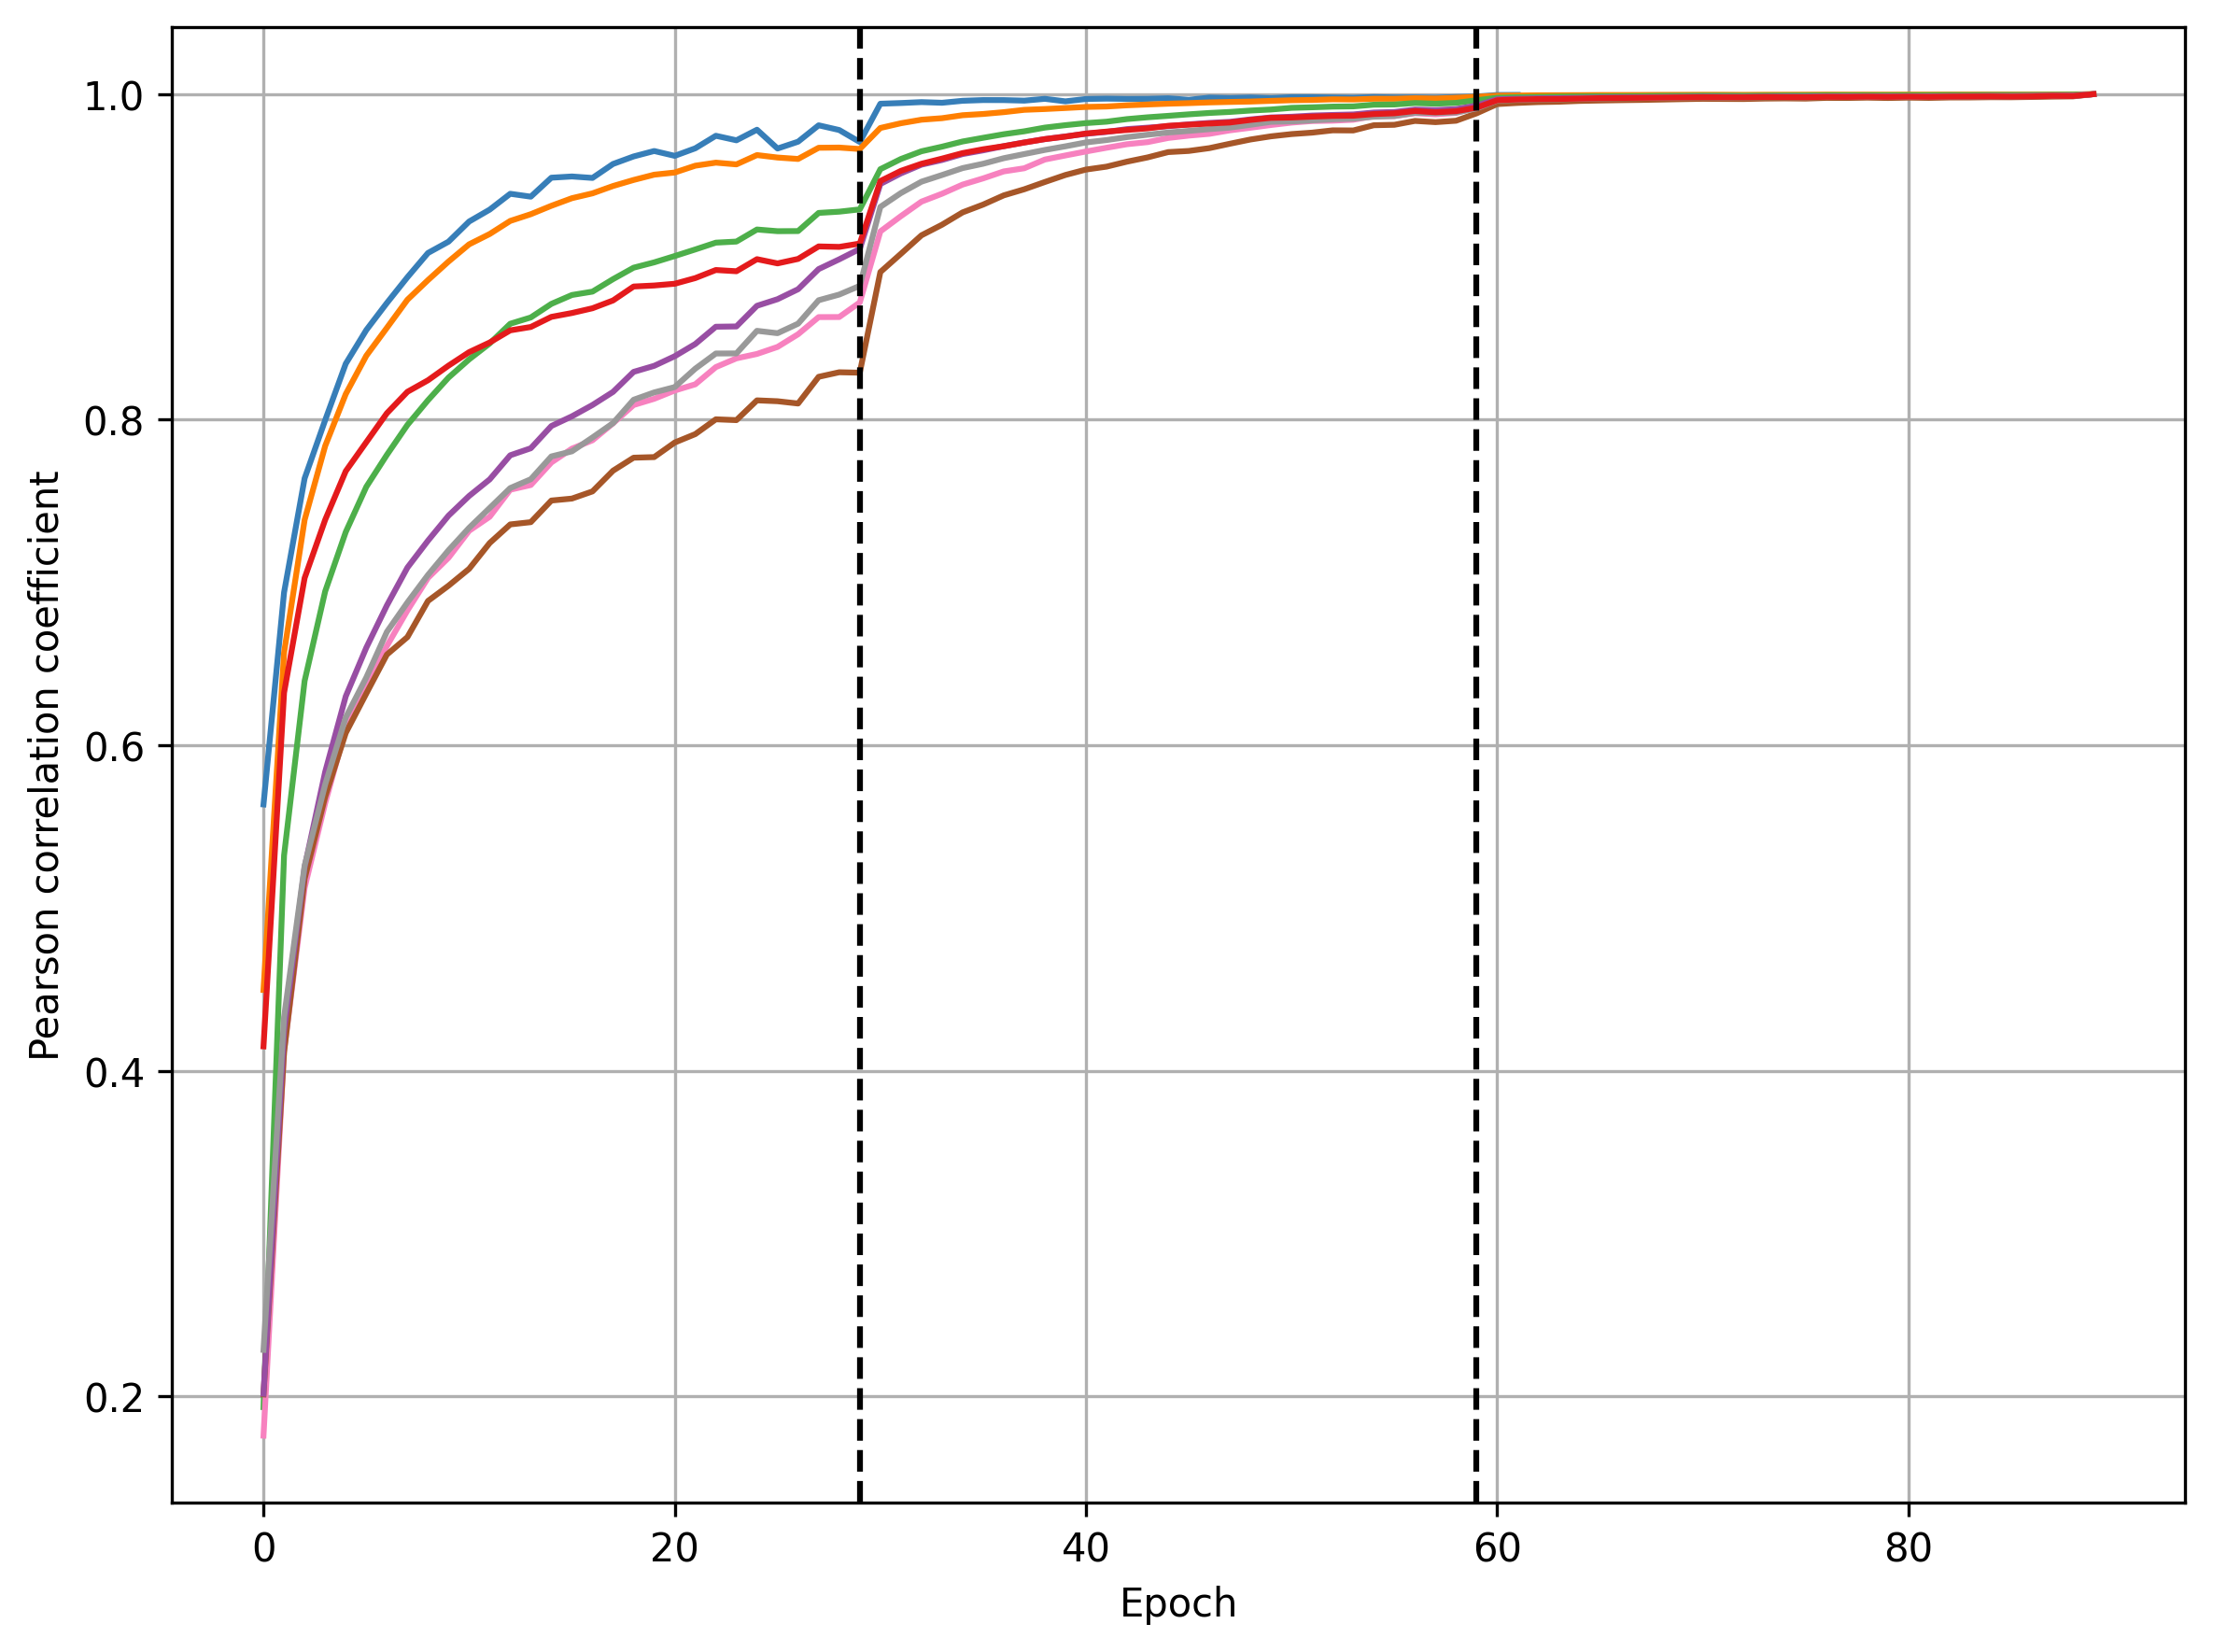

In [25]:
plt.figure(figsize=(8,6), dpi=300)

num_units = [64, 192, 384, 256, 256, 4096, 4096, 1000]

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

for i, (key, values) in enumerate(x.items()):
    arr = np.array(values)
    arr = arr.reshape(-1, num_units[i])
    
    plt.plot(np.mean(arr, axis=1), color=CB_color_cycle[i], alpha=1)
#     err = np.std(arr, axis=1)
#     ax[i].fill_between(np.arange(len(arr)), np.mean(arr, axis=1)-err, np.mean(arr, axis=1) + err, edgecolor='k', facecolor='lightgray', alpha=1)
    
#     ax[i].set_xlim(left=0, right=89)
#     ax[i].set_ylim(bottom=0, top=1)
    
#     if 'conv1' in key:
#         ax[i].plot(arr, color='k', alpha=0.2)

#     else:
#         ax[i].plot(arr, color='k', alpha=0.01)
        
#     ax[i].plot(arr, color='k', alpha=0.01*1000/num_units[i])
#     ax[i].axvline(29, color="k", linestyle="--")
#     ax[i].axvline(59, color="k", linestyle="--")

#     ax[i].set_xlabel('Epoch')
#     ax[i].set_title(f"{key} - n={num_units[i]}")

# fig.suptitle('Pearson correlation coefficient', fontsize=16)

# plt.title('AlexNet Weight Evolution During ImageNet Training')
plt.axvline(29, color="k", linestyle="--")
plt.axvline(59, color="k", linestyle="--")

plt.xlabel('Epoch')
plt.ylabel('Pearson correlation coefficient')

plt.grid()
plt.tight_layout()